## basic cnn
learn from: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html  

Change the dataset from CIFAR10 to MNIST

## basic cnn architecture
the image from : https://paperswithcode.com/methods/category/convolutional-neural-networks 

![basic cnn](basic_cnn.png)


## formulars
$ y_{1} = Conv2D(X)$  with kernel 5x5  
$ y_{2} = MaxPooling(y_{1})$ with window 2x2  
$ y_{3} = Conv2D(y_{2})$  with kernel 5x5  
$ y_{4} = MaxPooling(y_{3})$ with window 2x2  
$ y_{5} = Flatten(y_4)$  
$ y_{6} = Linear(y_{5})$  
$ y_{7} = ReLU(y_{6})$  
$ y_{8} = Linear(y_{7})$ 

In [1]:
#import pytorch
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [3]:
#set up cnn model
class simpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # RGB image with 1 color channels
        # output channels random.
        # kernel 3x3
        self.conv1 = nn.Conv2d(1,4,3)
        self.maxpooling = nn.MaxPool2d(2,2) #size of pooing window
        self.conv2 = nn.Conv2d(4, 12, 3)
        self.fc3 = nn.Linear(300, 4)        #mark
        self.fc4 = nn.Linear(4, 10)
    def forward(self, x):
        #x.shape ~= 28 * 28 * 1
        y1 = self.conv1(x)
        y2 = self.maxpooling(y1)
        y3 = self.conv2(y2)
        y4 = self.maxpooling(y3)
        y5 = torch.flatten(y4,1)
        y6 = self.fc3(y5)
        y7 = F.relu(y6)
        y8 = self.fc4(y7)
        return y8

In [4]:
#Data preparation

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0','1', '2', '3', '4','5', 
           '6', '7', '8', '9')

2.3%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%
4.0%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



image shape ==  torch.Size([4, 1, 28, 28])
labels shape ==  torch.Size([4])
labels  ==  tensor([1, 1, 8, 8])


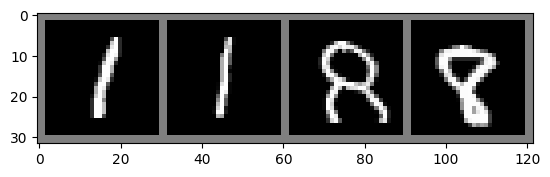

1     1     8     8    


In [5]:
#Data verify
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print("image shape == ", images.shape) #[batch_size, channel, height, weight]
print("labels shape == ", labels.shape)
print("labels  == ", labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
#configure model, loss function and optimizer 
net = simpleCNN()
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
#2m34s for cpu
net.to(device)

cuda:0


simpleCNN(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
  (maxpooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 12, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Linear(in_features=300, out_features=4, bias=True)
  (fc4): Linear(in_features=4, out_features=10, bias=True)
)

In [7]:
#star training
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.322
[1,  4000] loss: 1.435
[1,  6000] loss: 0.755
[1,  8000] loss: 0.492
[1, 10000] loss: 0.393
[1, 12000] loss: 0.330
[1, 14000] loss: 0.324
[2,  2000] loss: 0.290
[2,  4000] loss: 0.262
[2,  6000] loss: 0.254
[2,  8000] loss: 0.248
[2, 10000] loss: 0.224
[2, 12000] loss: 0.225
[2, 14000] loss: 0.243
Finished Training


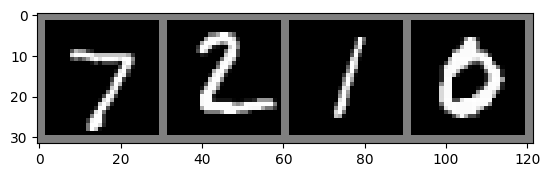

GroundTruth:  7     2     1     0    
Predicted:  7     2     1     0    


In [9]:
#load test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

#predict
PATH = './data/mnist_net.pth'
torch.save(net.state_dict(), PATH)
net = simpleCNN()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))